This notebook will do EDA to help answer some questions and further refine others.
EDA topics:
   1) price vs year sold -- groupby year sold, average price -- DONE
   2) price vs zipcode -- groupby zipcode, average price
   3) price vs year built -- groupby year, average price
   4) price vs zestimate -- line chart
   5) price vs days on zillow (recently sold only) -- histogram
   6) number of outliers of price (calculate IQR and get values beyond)
   7) average(price/zestimate) vs zipcode (recently sold only) -- line graph (shows value over/under per zipcode)
   8) days on zillow vs pageviews and favorites
   9) pageviews and favorites vs price/zestimate

In [242]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator

pd.options.display.max_columns = None

In [243]:
# function to calculate outliers and return list of outliers and non-outliers

def outliers(sortedList: pd.DataFrame):

    outlierBoolean = []

    Q1 = np.percentile(sortedList, 25)
    Q3 = np.percentile(sortedList, 75)
    IQR = Q3 - Q1

    upperBound = Q3 + 1.5*IQR
    lowerBound = Q1 - 1.5*IQR

    for value in sortedList:
        if (value < lowerBound or value > upperBound):
            outlierBoolean.append(1)
        else:
            outlierBoolean.append(0)

    return outlierBoolean

In [244]:
df_forSale = pd.read_csv('cleaned_forSale_data.csv', index_col=0)
df_recentlySold = pd.read_csv('cleaned_recentlySold_data.csv', index_col=0)

df_recentlySold['dateSold'] = pd.to_datetime(df_recentlySold['dateSoldString'])
df_recentlySold.drop('dateSoldString', axis=1, inplace=True)

In [245]:
# Check for outliers in list price and sold price.
soldPrice = df_recentlySold['price'].sort_values()
outlierBoolean = outliers(soldPrice)
df_recentlySold.insert(5, "priceOutlier", outlierBoolean, True)

listPrice = df_forSale['price'].sort_values()
outlierBoolean = outliers(listPrice)
df_forSale.insert(4, "priceOutlier", outlierBoolean, True)

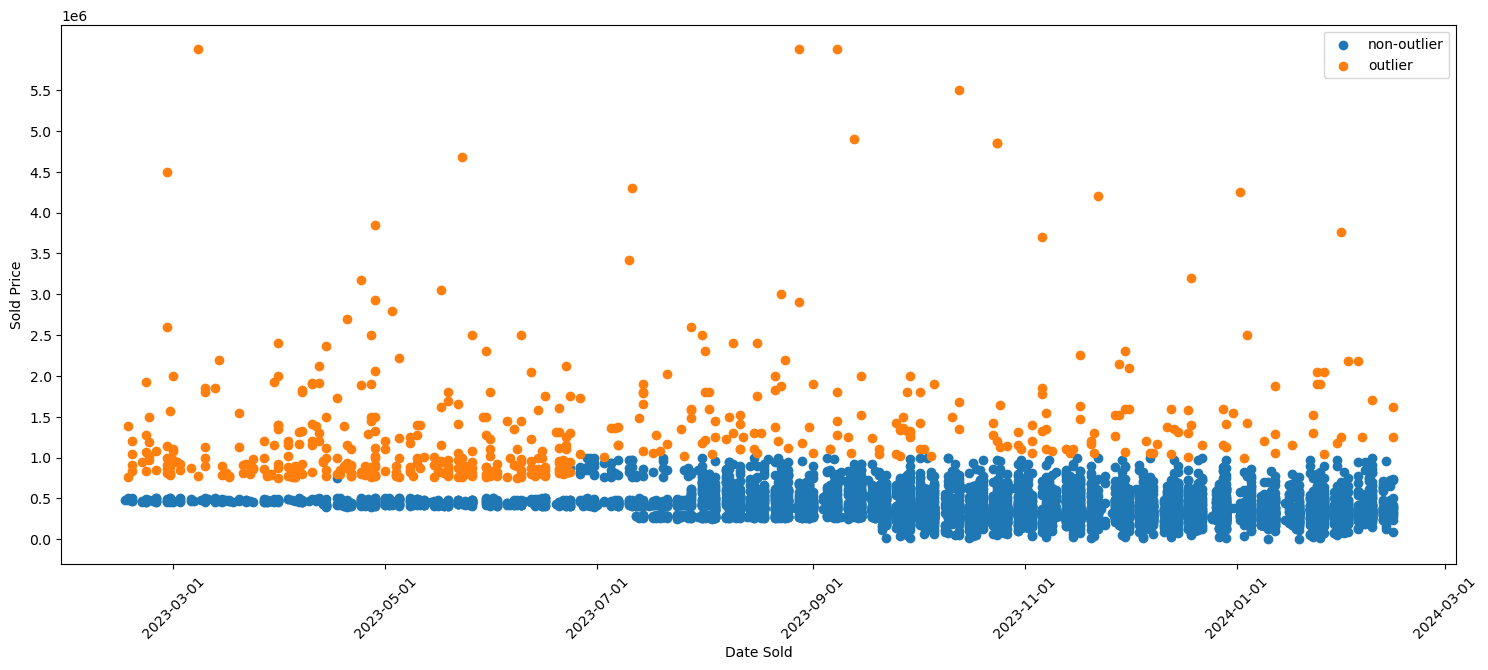

In [246]:
# Plot price per year sold on scatter plot
fig, ax = plt.subplots(figsize =(18, 7))

# Scatter plot for non-outliers
ax.scatter(
    x=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['dateSold'],
    y=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['price'],
    label='Non-Outlier'
)

# Scatter plot for outliers
ax.scatter(
    x=df_recentlySold[df_recentlySold['priceOutlier'] == 1]['dateSold'],
    y=df_recentlySold[df_recentlySold['priceOutlier'] == 1]['price'],
    label='Outlier'
)

# Set the frequency of x-axis ticks (e.g., every 7 days)
ax.xaxis.set_major_locator(AutoDateLocator(interval_multiples=True))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(np.arange(df_recentlySold['price'].min(), df_recentlySold['price'].max(), 500000))
plt.ylabel('Sold Price')
plt.xlabel('Date Sold')
plt.legend(('non-outlier','outlier'), loc='upper right')
plt.show()

In [247]:
df_forSale['timeOnZillow.1'] = df_forSale['timeOnZillow.1'].apply(lambda x: x.strip(' days')).astype(int)

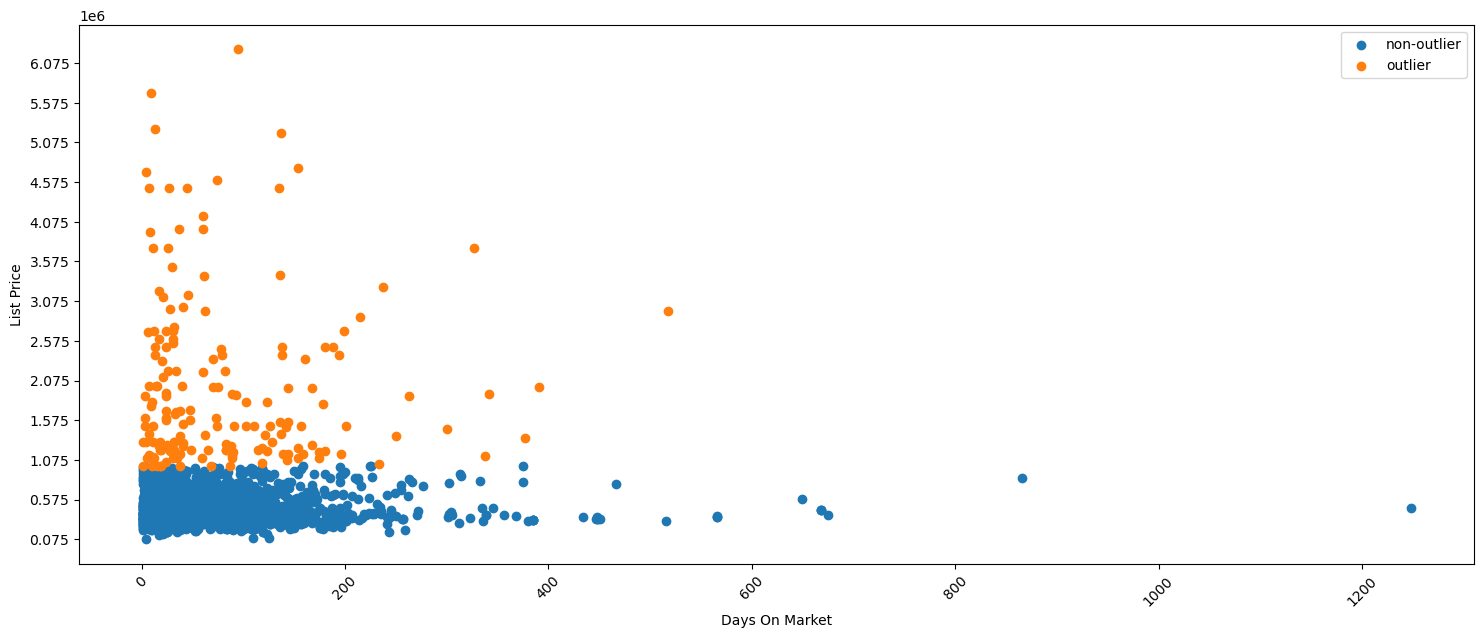

In [248]:
# Plot price per year sold on scatter plot
fig, ax = plt.subplots(figsize =(18, 7))

# Scatter plot for non-outliers
ax.scatter(
    x=df_forSale[df_forSale['priceOutlier'] == 0]['timeOnZillow.1'],
    y=df_forSale[df_forSale['priceOutlier'] == 0]['price'],
    label='Non-Outlier'
)

# Scatter plot for outliers
ax.scatter(
    x=df_forSale[df_forSale['priceOutlier'] == 1]['timeOnZillow.1'],
    y=df_forSale[df_forSale['priceOutlier'] == 1]['price'],
    label='Outlier'
)

# Set the frequency of x-axis ticks (e.g., every 7 days)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(np.arange(df_forSale['price'].min(), df_forSale['price'].max(), 500000))
plt.ylabel('List Price')
plt.xlabel('Days On Market')
plt.legend(('non-outlier','outlier'), loc='upper right')
plt.show()

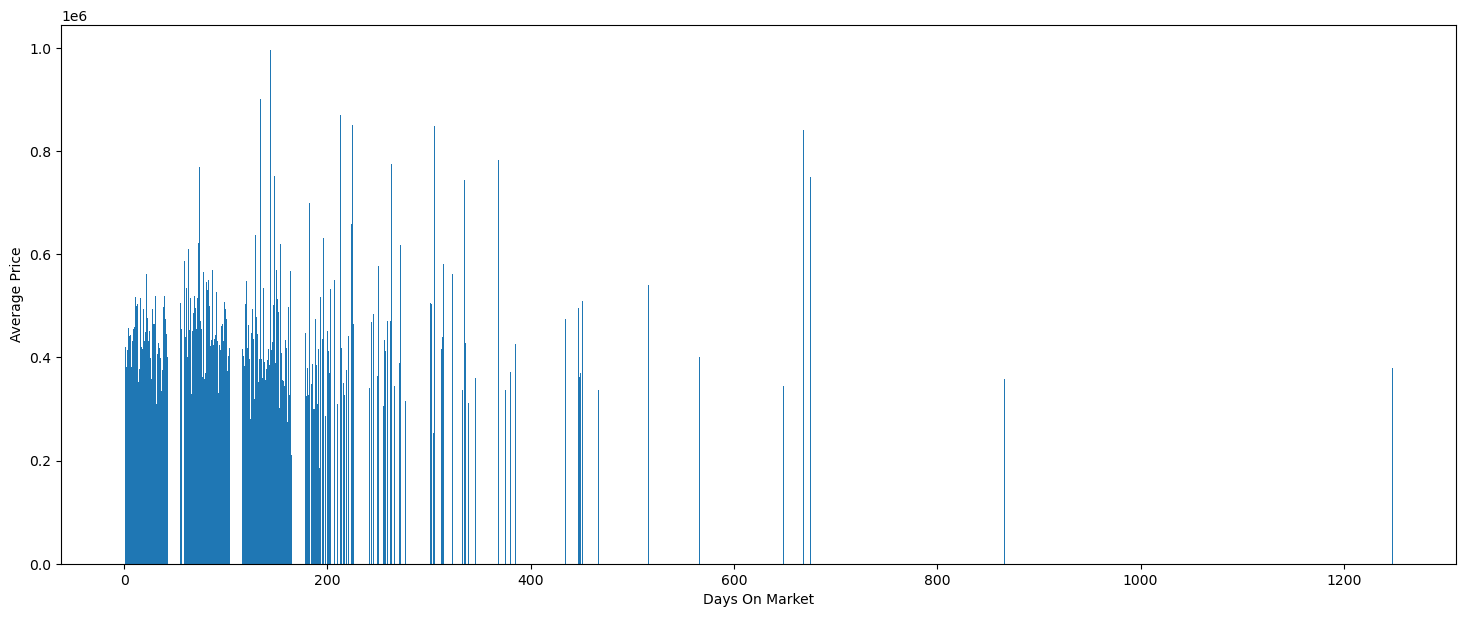

In [249]:
# Groupby average list price vs date sold. Only look at non-outliers
fig, ax = plt.subplots(figsize =(18, 7))

stuff = df_forSale['price'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['timeOnZillow.1']).mean()
# stuff = df_forSale['price'].groupby(df_forSale['timeOnZillow.1']).mean()

unique_stuff = df_forSale['timeOnZillow.1'].loc[df_forSale['priceOutlier']==0].unique()
# unique_stuff = df_forSale['timeOnZillow.1'].unique()

ax.bar(x=unique_stuff, height=stuff)
plt.ylabel('Average Price')
plt.xlabel('Days On Market')
plt.show()

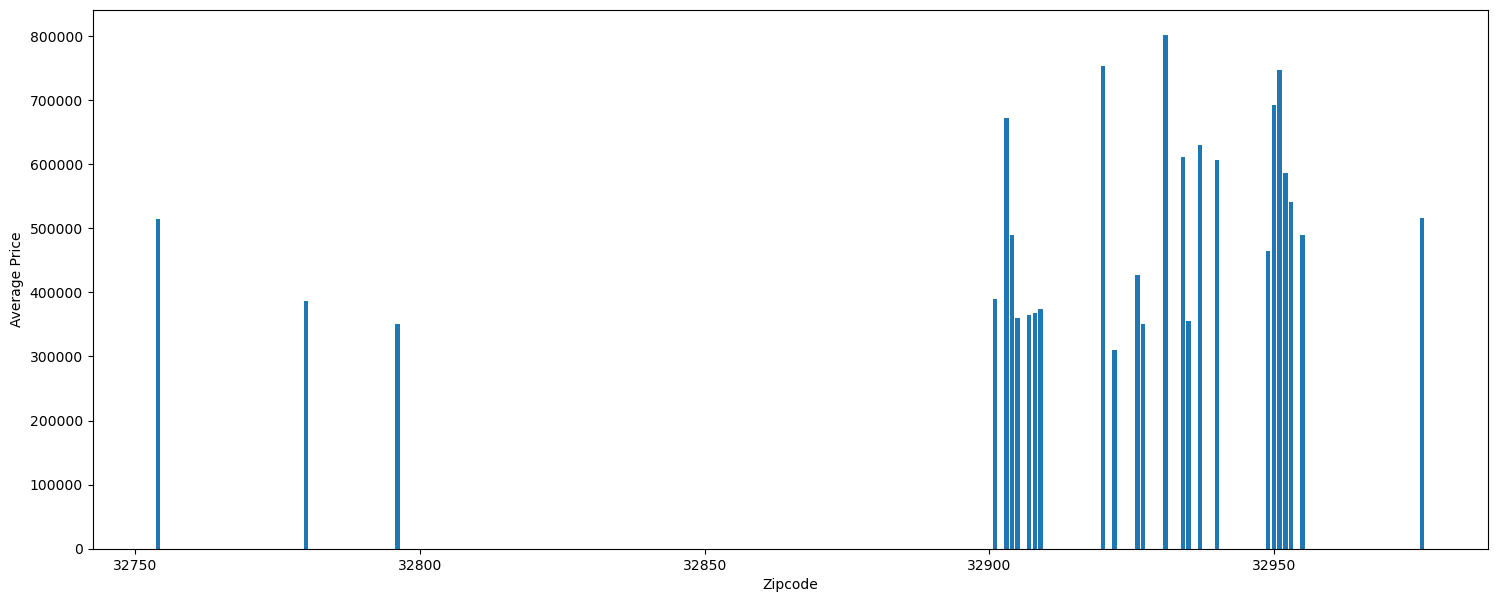

In [260]:
# Groupby average list price vs zipcode. Only look at non-outliers
fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_forSale['price'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['zipcode']).mean().reset_index()
# data = df_forSale['price'].groupby(df_forSale['zipcode']).mean().reset_index()
data.rename(columns={'price':'averagePrice'}, inplace=True)

ax.bar(x=data['zipcode'], height=data['averagePrice'])
plt.ylabel('Average Price')
plt.xlabel('Zipcode')
plt.show()

del data